In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_path = '/content/Picture1.jpg'
image = cv2.imread(img_path)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def plot_histogram(image, title, is_gray=False, probability=False):
    plt.figure()
    if is_gray:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        if probability:
            hist /= hist.sum()
        plt.plot(hist, color='black')
    else:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            if probability:
                hist /= hist.sum()
            plt.plot(hist, color=col)

    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency" if not probability else "Probability")
    plt.show()

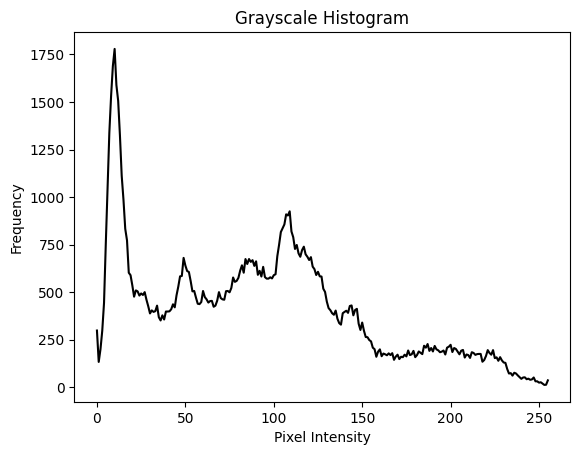

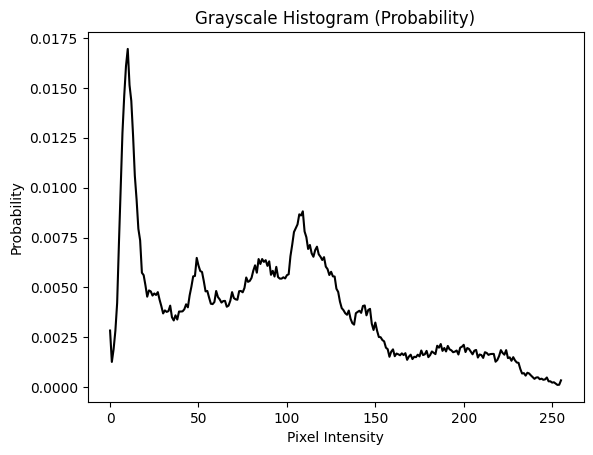

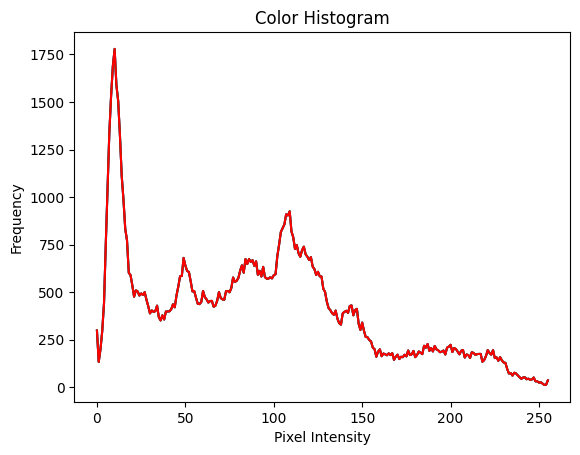

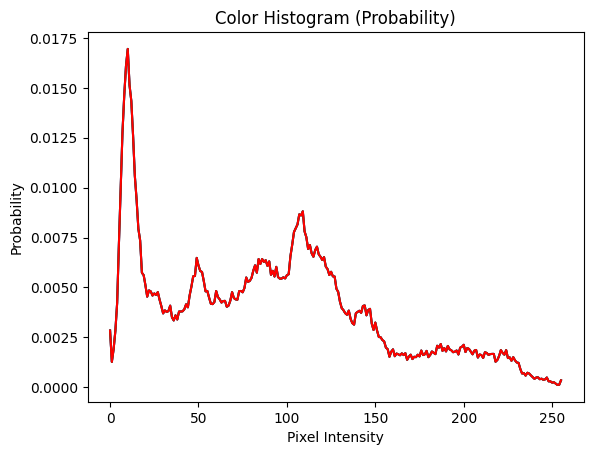

In [ ]:
plot_histogram(gray, "Grayscale Histogram", is_gray=True)
plot_histogram(gray, "Grayscale Histogram (Probability)", is_gray=True, probability=True)
plot_histogram(image, "Color Histogram")
plot_histogram(image, "Color Histogram (Probability)", probability=True)

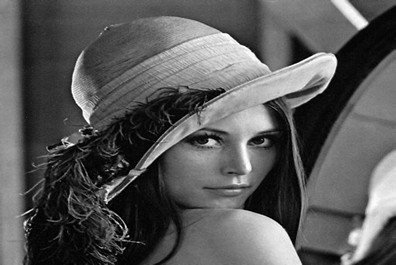

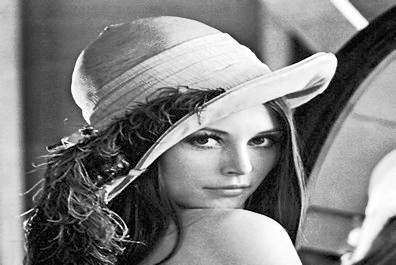

In [ ]:
from google.colab.patches import cv2_imshow

equalized_gray = cv2.equalizeHist(gray)
cv2_imshow(gray) # orig
cv2_imshow( equalized_gray) # equalize
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def fft_image(image_channel):
    dft = np.fft.fft2(image_channel)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

def ifft_image(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift)
    return np.abs(img_reconstructed)

In [ ]:
channels = cv2.split(image)
fft_results = [fft_image(ch) for ch in channels]
magnitude_spectrums = [res[2] for res in fft_results]

In [ ]:
reconstructed_channels = [ifft_image(res[1]) for res in fft_results]
reconstructed_image = cv2.merge(reconstructed_channels).astype(np.uint8)

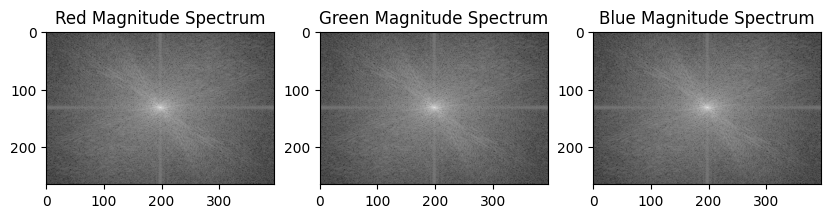

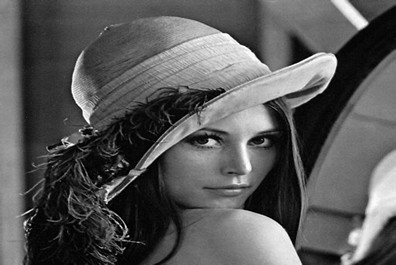

In [ ]:
plt.figure(figsize=(10, 5))
for i, (color, mag) in enumerate(zip(('Red', 'Green', 'Blue'), magnitude_spectrums)):
    plt.subplot(1, 3, i+1), plt.imshow(mag, cmap='gray'), plt.title(f'{color} Magnitude Spectrum')

plt.show()

cv2_imshow(reconstructed_image)  # reconstructed
cv2.waitKey(0)
cv2.destroyAllWindows()

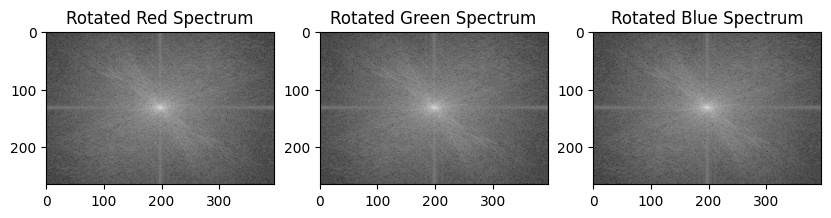

In [ ]:
rotated_image = cv2.rotate(image, cv2.ROTATE_180)  # Rotate 180 deg
rotated_channels = cv2.split(rotated_image)
rotated_fft_results = [fft_image(ch) for ch in rotated_channels]
rotated_spectrums = [res[2] for res in rotated_fft_results]

plt.figure(figsize=(10, 5))
for i, (color, mag) in enumerate(zip(('Red', 'Green', 'Blue'), rotated_spectrums)):
    plt.subplot(1, 3, i+1), plt.imshow(mag, cmap='gray'), plt.title(f'Rotated {color} Spectrum')

plt.show()